In [1]:
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing all Necessary Liberaries.

In [2]:
df_train=pd.read_csv("BigMart_train.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Importing the Training Dataset.

In [3]:
df_test=pd.read_csv("Bigmart_test.csv")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Importing the testing Dataset

In [4]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Here we can see that mean is very high than Standard Deviation.
There are more difference of value between 50% percentail and Max value.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Here we can see that so many catogarical data which we have to encode it to numerical data in future for model creation.


In [6]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Here we can see the various calculation for testing dataset.

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here we can can see that in Item_Weight and Outlet_Size size there are many null values present and later we have to fill the null value will mean/mode values.

In [10]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
This gives us an idea that these many counts are avilable in the particular criteria of the content.

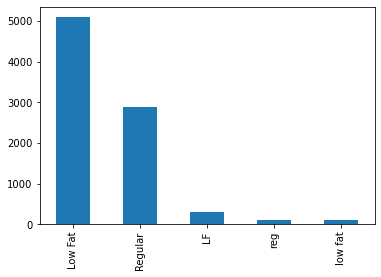

In [11]:
df_train['Item_Fat_Content'].value_counts(normalize=True)
df_train['Item_Fat_Content'].value_counts().plot.bar()
plt.show()

In [ ]:
Now using the bar plot we can visualize the count of the items in that particular content.

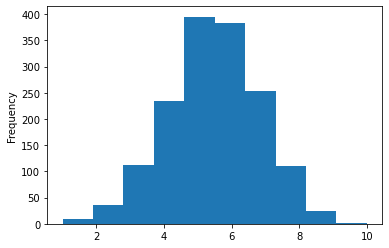

In [12]:
df_train['Item_Identifier'].value_counts(normalize=True)
df_test['Item_Identifier'].value_counts().plot.hist()
plt.show()

Now using the bar plot we can visualize the count of the items in that particular Item_Identifier.

In [13]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Here we can figure it out the count of the particular type of items present.

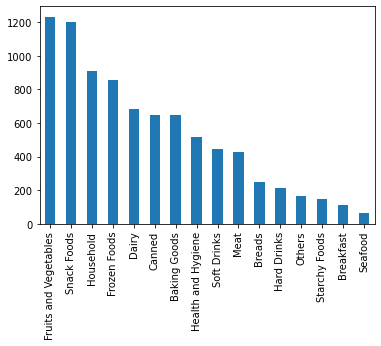

In [14]:
df_train['Item_Type'].value_counts(normalize=True)
df_train['Item_Type'].value_counts().plot.bar()
plt.show()

In [15]:
df_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

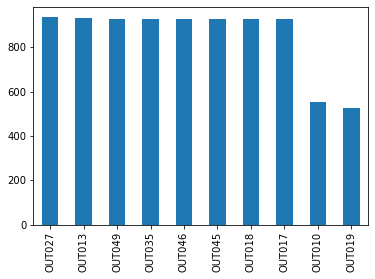

In [16]:
df_train['Outlet_Identifier'].value_counts(normalize=True)
df_train['Outlet_Identifier'].value_counts().plot.bar()
plt.show()

Using the bar plot clearly we can figure it outr that these many outlets are present.

In [17]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

The 'Outlet_Location_Type' tell us that these many outlets are coming under tier1,2,3.

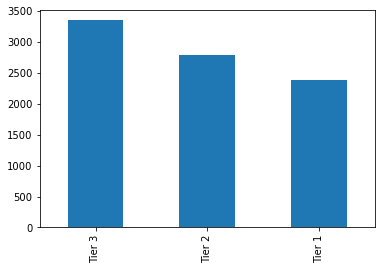

In [18]:
df_train['Outlet_Location_Type'].value_counts(normalize=True)
df_train['Outlet_Location_Type'].value_counts().plot.bar()
plt.show()

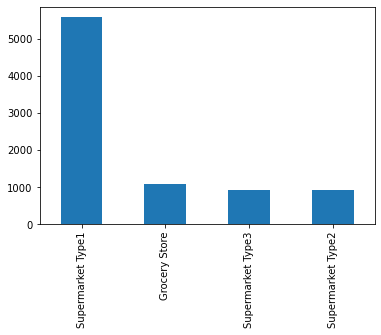

In [162]:
df_train['Outlet_Type'].value_counts(normalize=True)
df_train['Outlet_Type'].value_counts().plot.bar()
plt.show()


From this bar plot we can find out what type od outlet is present and their count.

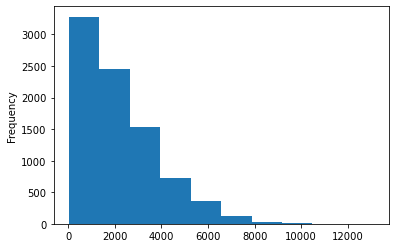

In [20]:
df_train['Item_Outlet_Sales'].plot.hist()
plt.show()

The 'Item_Outlet_Sales' is the label/Output column. 

In [21]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

Here i am filling the null value that is present in the 'Item_Weight' and 'Outlet_Size' with their mean and mode value.
For both training and testing dataset.

In [22]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now i find that all null values got converted and zero null values are present in both the training and testing dataset.

In [23]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


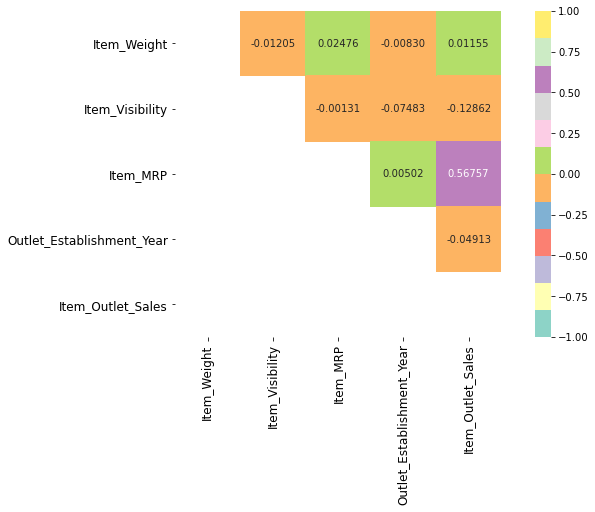

In [155]:
lower_triangle = np.tril(df_train.corr())
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="Set3",mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
num=df_train.select_dtypes(exclude=np.object)
cat=df_train.select_dtypes(include=np.object)

In [27]:
num1=df_test.select_dtypes(exclude=np.object)
cat1=df_test.select_dtypes(include=np.object)

In the above two code i am seperating the catogarical data and numerical data in seperate variable to encode the catogrical data and then i will merege them together.

In [28]:
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [29]:
cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [30]:
num1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [31]:
cat1.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


### Label Encoder:

In [32]:
le=LabelEncoder()
cat=cat.apply(le.fit_transform)

In [33]:
cat1=cat1.apply(le.fit_transform)

Using the LabelEncoder i am now converting the catogerical data into numerical data for both the training and the testing data.

In [34]:
cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1


In [35]:
cat1.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1


In [36]:
num.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [37]:
num1.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

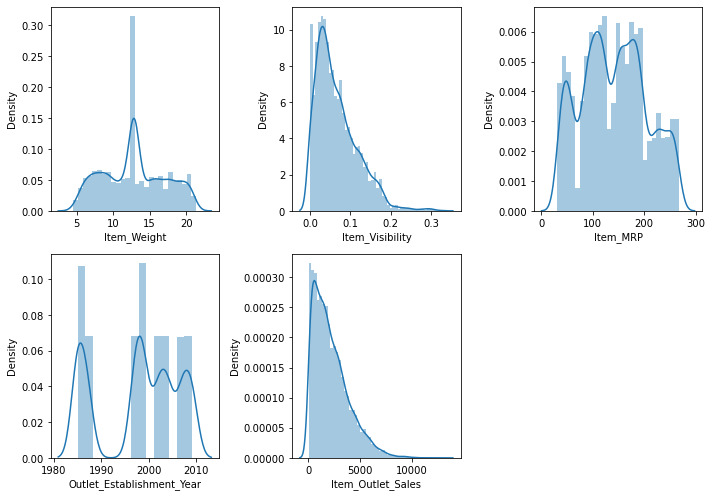

In [38]:
plt.figure(figsize = (10,10))
pltno = 1

for column in num:
    if pltno <=5:
        ax = plt.subplot(3,3,pltno)              ## Train dataset numerical data plot
        sns.distplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltno+=1
plt.tight_layout()

The distplot is used to cleraly tell us how the normal curve is and from the curve we can predict that certain column has either positive/negative skewness present which shows the presence of the outliers.

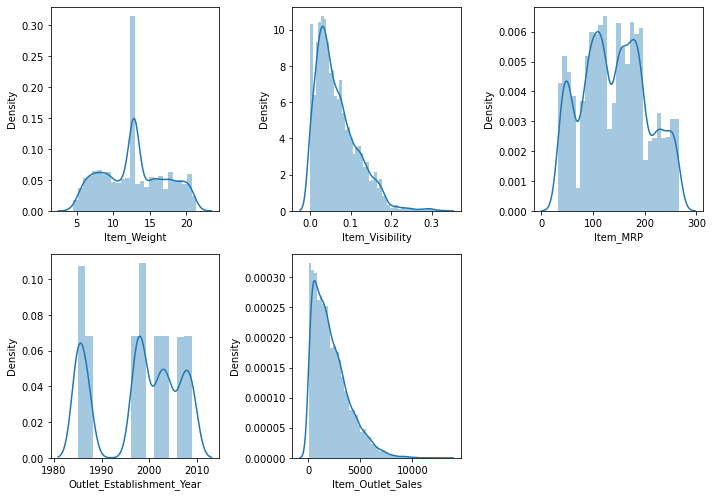

In [39]:
plt.figure(figsize=(10,10))
pltno=1

for column in num1:
    if pltno<=5:
        ax=plt.subplot(3,3,pltno)
        sns.distplot(num1[column])
        plt.xlabel(column,fontsize=10)
        pltno+=1
        plt.tight_layout()

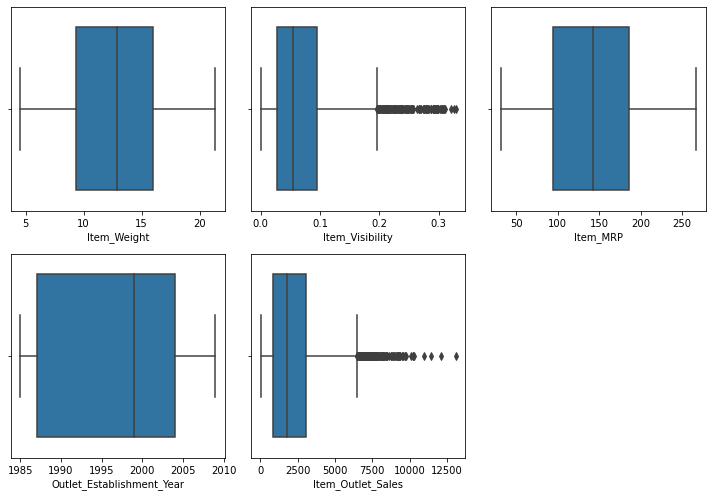

In [40]:
plt.figure(figsize = (10,10))
pltno = 1

for column in num:
    if pltno<=5:
        ax = plt.subplot(3,3,pltno)       #Outliers checking for Train - numerical data
        sns.boxplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltno+=1
plt.tight_layout()


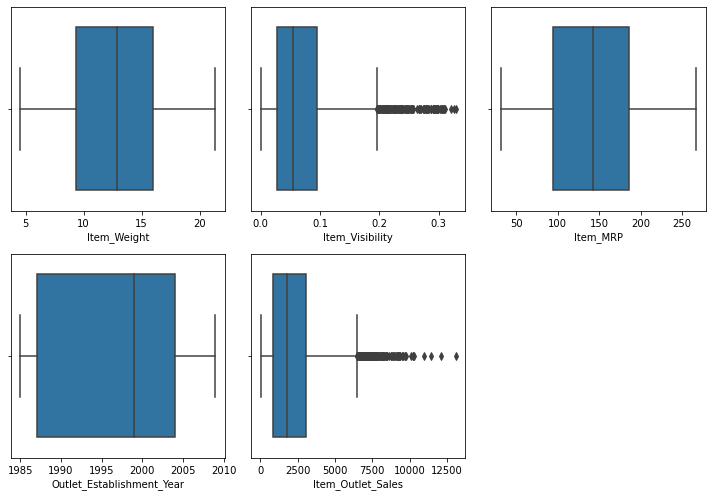

In [41]:
plt.figure(figsize = (10,10))
pltno = 1

for column in num1:
    if pltno<=5:
        ax = plt.subplot(3,3,pltno)       #Outliers checking for Test - numerical data
        sns.boxplot(num1[column])
        plt.xlabel(column,fontsize=10)
        pltno+=1
plt.tight_layout()

From the Box plot we can see that some outlers are present in certain columns and we have treat the outliers to get good effecient model.

### Removing the Outliers:

In [42]:
from scipy.stats import zscore

z = np.abs(zscore(num))
threshold = 3
df_new = num[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",num.shape)
print("shape after" .ljust(20),":",df_new.shape)
print("% loss" .ljust(20),":",((num.shape[0]-df_new.shape[0])/num.shape[0])*100)


shape before and after
shape before         : (8523, 5)
shape after          : (8338, 5)
% loss               : 2.170597207556025


In [43]:
from scipy.stats import zscore

z = np.abs(zscore(num1))
threshold = 3
df_new1 = num1[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",num1.shape)
print("shape after" .ljust(20),":",df_new1.shape)
print("% loss" .ljust(20),":",((num1.shape[0]-df_new1.shape[0])/num1.shape[0])*100)


shape before and after
shape before         : (8523, 5)
shape after          : (8338, 5)
% loss               : 2.170597207556025


Using Zscore method i have removed the outliers present in the numerical data of both testing and the training dataset and i have also shown the % of Loss in the data. 

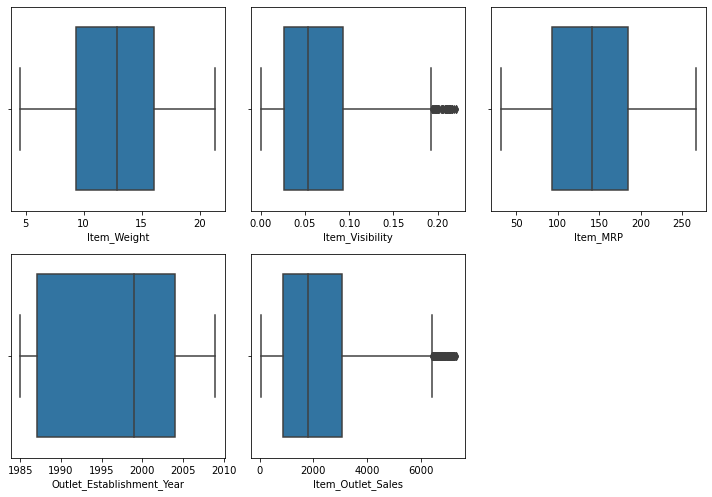

In [44]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)    ##train set after zscore
        sns.boxplot(df_new[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()


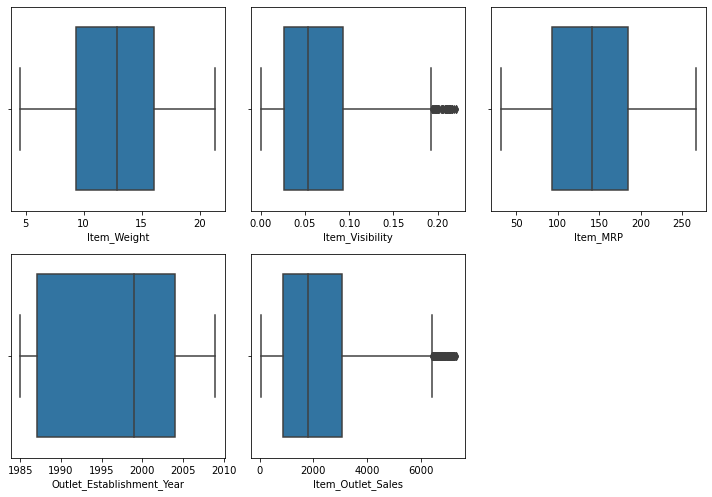

In [45]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new1:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)
        sns.boxplot(df_new1[column])          ##testset after zscore
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

After removing the outliers from the numerical dataset and again i visualised the dataset to check any outliers are present in the dataset by using the box plot. 
and we can see from the box plot that reasonable amount of outlier datas present in the dataset.

In [46]:
df_new.skew()

Item_Weight                  0.089291
Item_Visibility              0.794272
Item_MRP                     0.138990
Outlet_Establishment_Year   -0.423379
Item_Outlet_Sales            0.878267
dtype: float64

In [47]:
df1= np.sqrt(df_new)
df1.skew()

Item_Weight                 -0.207776
Item_Visibility             -0.245035
Item_MRP                    -0.274272
Outlet_Establishment_Year   -0.425418
Item_Outlet_Sales            0.112275
dtype: float64

In [48]:
df2 = np.sqrt(df_new1)
df2.skew()

Item_Weight                 -0.207776
Item_Visibility             -0.245035
Item_MRP                    -0.274272
Outlet_Establishment_Year   -0.425418
Item_Outlet_Sales            0.112275
dtype: float64

From this we can find that the features are not in the level of skewness that is between -0.5 to 0.5.

In [49]:
df1.skew()

Item_Weight                 -0.207776
Item_Visibility             -0.245035
Item_MRP                    -0.274272
Outlet_Establishment_Year   -0.425418
Item_Outlet_Sales            0.112275
dtype: float64

In [50]:
df2.skew()

Item_Weight                 -0.207776
Item_Visibility             -0.245035
Item_MRP                    -0.274272
Outlet_Establishment_Year   -0.425418
Item_Outlet_Sales            0.112275
dtype: float64

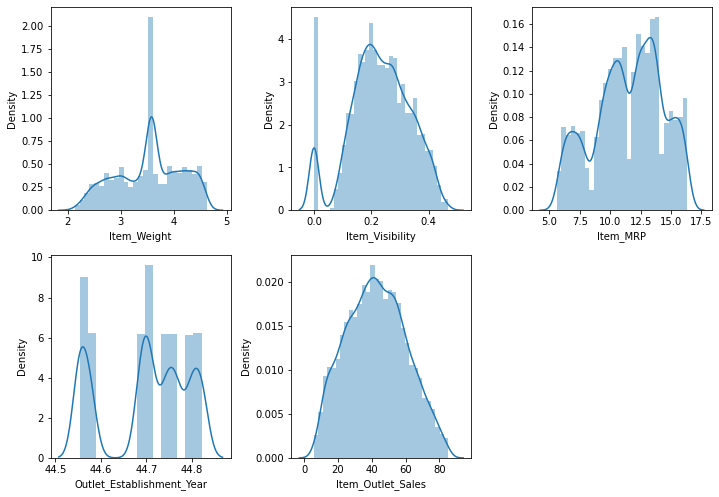

In [51]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df1:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)        # Train set after skewness removal
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

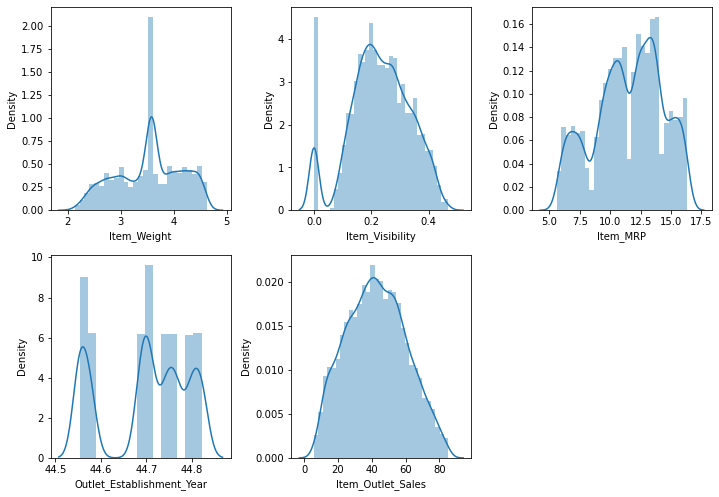

In [52]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df2:
    if pltnumber<=5:
        ax = plt.subplot(3,3,pltnumber)     ##test set after skewness removal
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()


After removing the skewness we can see that the normal curve is alomost like a bell curve.

In [53]:
train = pd.concat([df1,cat],axis=1)
train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3.049590,0.126678,15.805354,44.710178,61.115775,156,1,4,9,1,0,1
1,2.433105,0.138846,6.947604,44.821870,21.057607,8,2,14,3,1,2,2
2,4.183300,0.129461,11.900336,44.710178,45.795961,662,1,10,9,1,0,1
3,4.381780,0.000000,13.494258,44.698993,27.062520,1121,2,6,0,1,2,0
4,2.988311,0.000000,7.339033,44.575778,31.538947,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,2.620115,0.238293,14.646563,44.575778,52.710373,370,1,13,1,0,2,1
8519,2.894823,0.216754,10.399856,44.743715,23.436830,897,2,0,7,1,1,1
8520,3.255764,0.187580,9.226180,44.766059,34.541477,1357,1,8,6,2,1,1
8521,2.685144,0.381078,10.155452,44.821870,42.960419,681,2,13,3,1,2,2


In [54]:
test = pd.concat([df2,cat1],axis = 1)
test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,3.049590,0.126678,15.805354,44.710178,61.115775,156,1,4,9,1,0,1
1,2.433105,0.138846,6.947604,44.821870,21.057607,8,2,14,3,1,2,2
2,4.183300,0.129461,11.900336,44.710178,45.795961,662,1,10,9,1,0,1
3,4.381780,0.000000,13.494258,44.698993,27.062520,1121,2,6,0,1,2,0
4,2.988311,0.000000,7.339033,44.575778,31.538947,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,2.620115,0.238293,14.646563,44.575778,52.710373,370,1,13,1,0,2,1
8519,2.894823,0.216754,10.399856,44.743715,23.436830,897,2,0,7,1,1,1
8520,3.255764,0.187580,9.226180,44.766059,34.541477,1357,1,8,6,2,1,1
8521,2.685144,0.381078,10.155452,44.821870,42.960419,681,2,13,3,1,2,2


Here in the above codes i have concatened both the numerical and catogerical data in to the training and testing dataset.

In [55]:
train.isnull().sum()

Item_Weight                  185
Item_Visibility              185
Item_MRP                     185
Outlet_Establishment_Year    185
Item_Outlet_Sales            185
Item_Identifier                0
Item_Fat_Content               0
Item_Type                      0
Outlet_Identifier              0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [56]:
train = train.dropna()
train= train.reset_index(drop= True)

In [57]:
test.isnull().sum()

Item_Weight                  185
Item_Visibility              185
Item_MRP                     185
Outlet_Establishment_Year    185
Item_Outlet_Sales            185
Item_Identifier                0
Item_Fat_Content               0
Item_Type                      0
Outlet_Identifier              0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [58]:
test=test.dropna()
test=test.reset_index(drop= True)

From the above set of codes i find out how many null values are present in the training and testing dataset and i droped the null values from both the datasets.

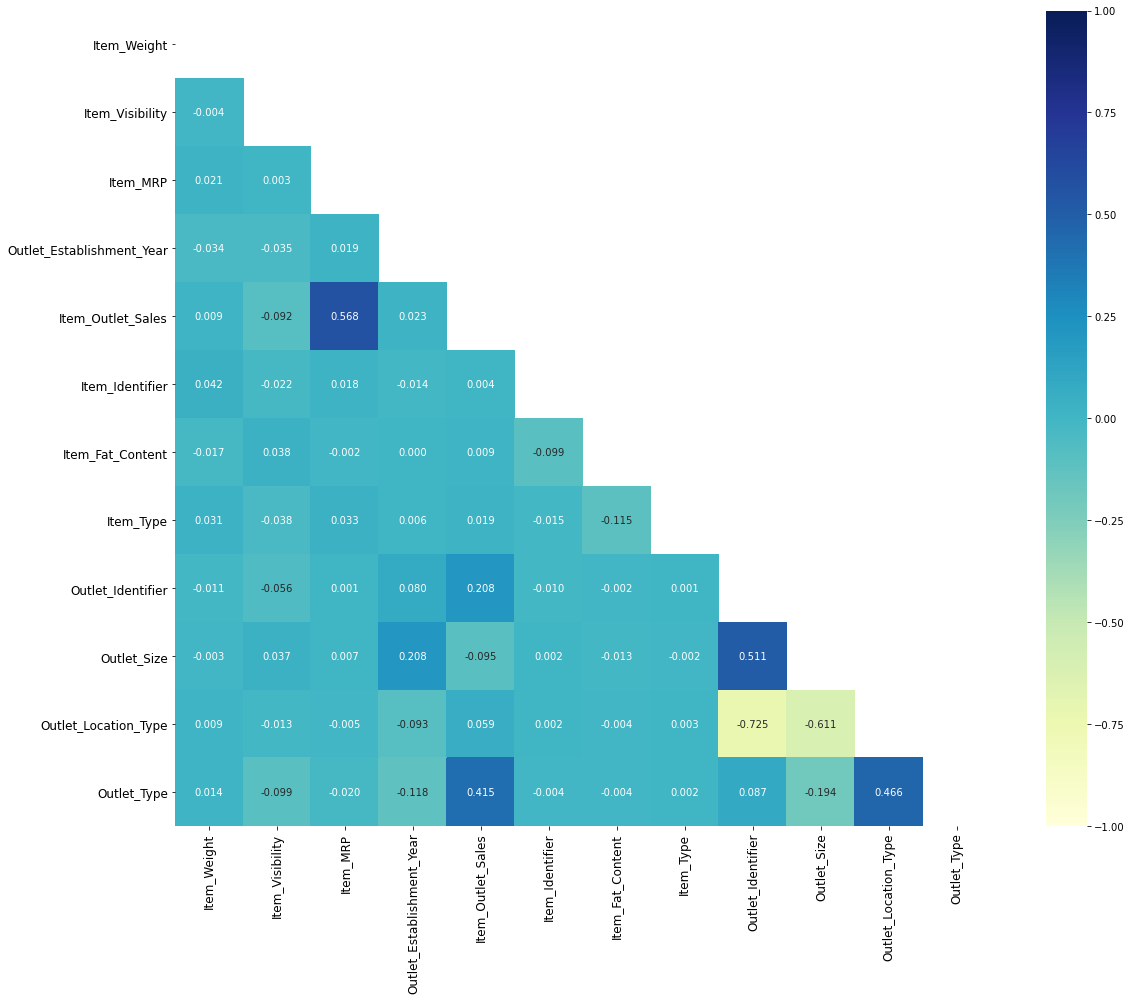

In [148]:
triangle = np.triu(train.corr())
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="YlGnBu", mask=triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

1. Item_outlet_sales is strongly positive correlated with the Item_MRP
2. Outlet_Size is strongly positive correlated with the Outlet_Identifier.
3. Outlet_Location_type is strong postive Correlated with the Outlet_Type.
4. Outlet_Location_type are strong negatively correlated with the Outlet_Identifier.


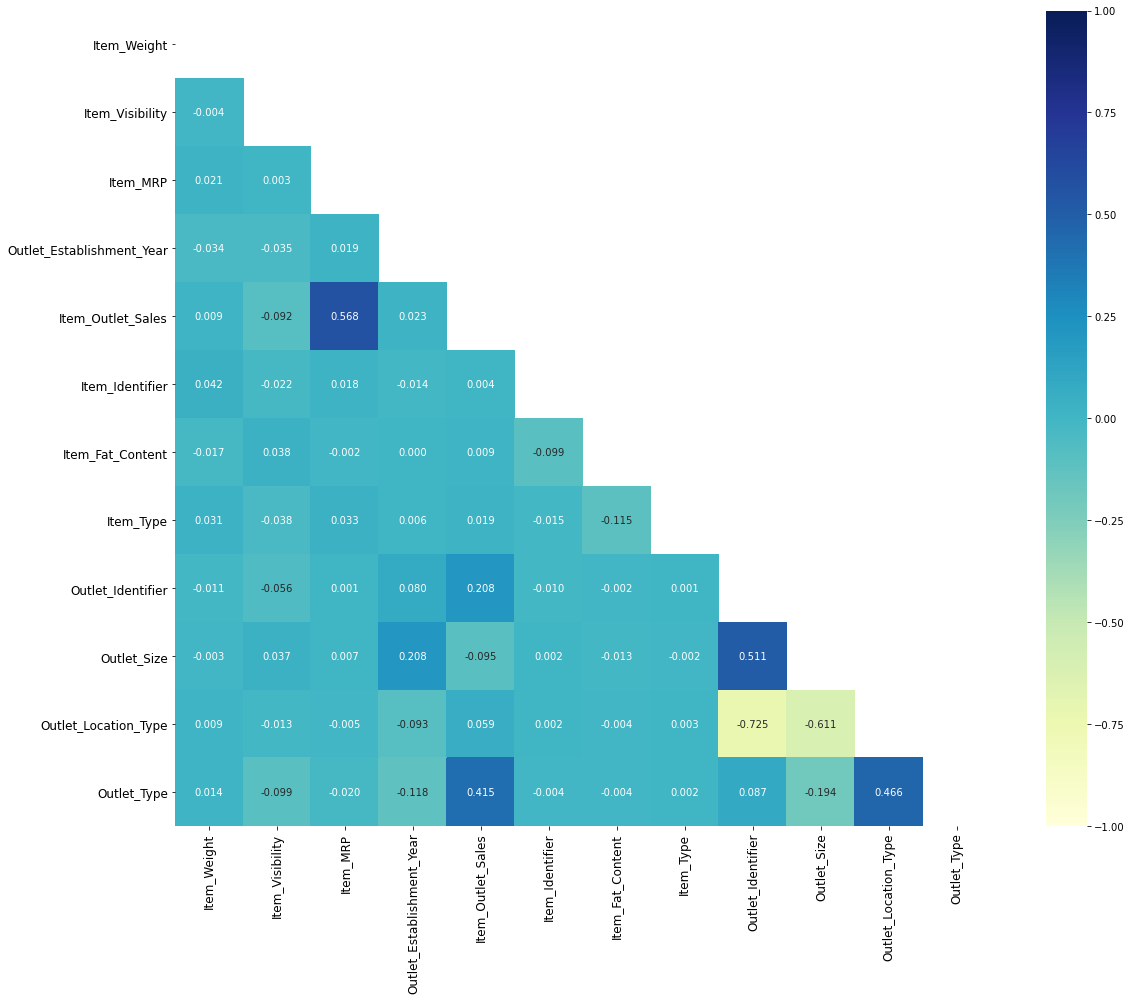

In [149]:
triangle = np.triu(test.corr())
plt.figure(figsize=(20,15))
sns.heatmap(test.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="YlGnBu", mask=triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

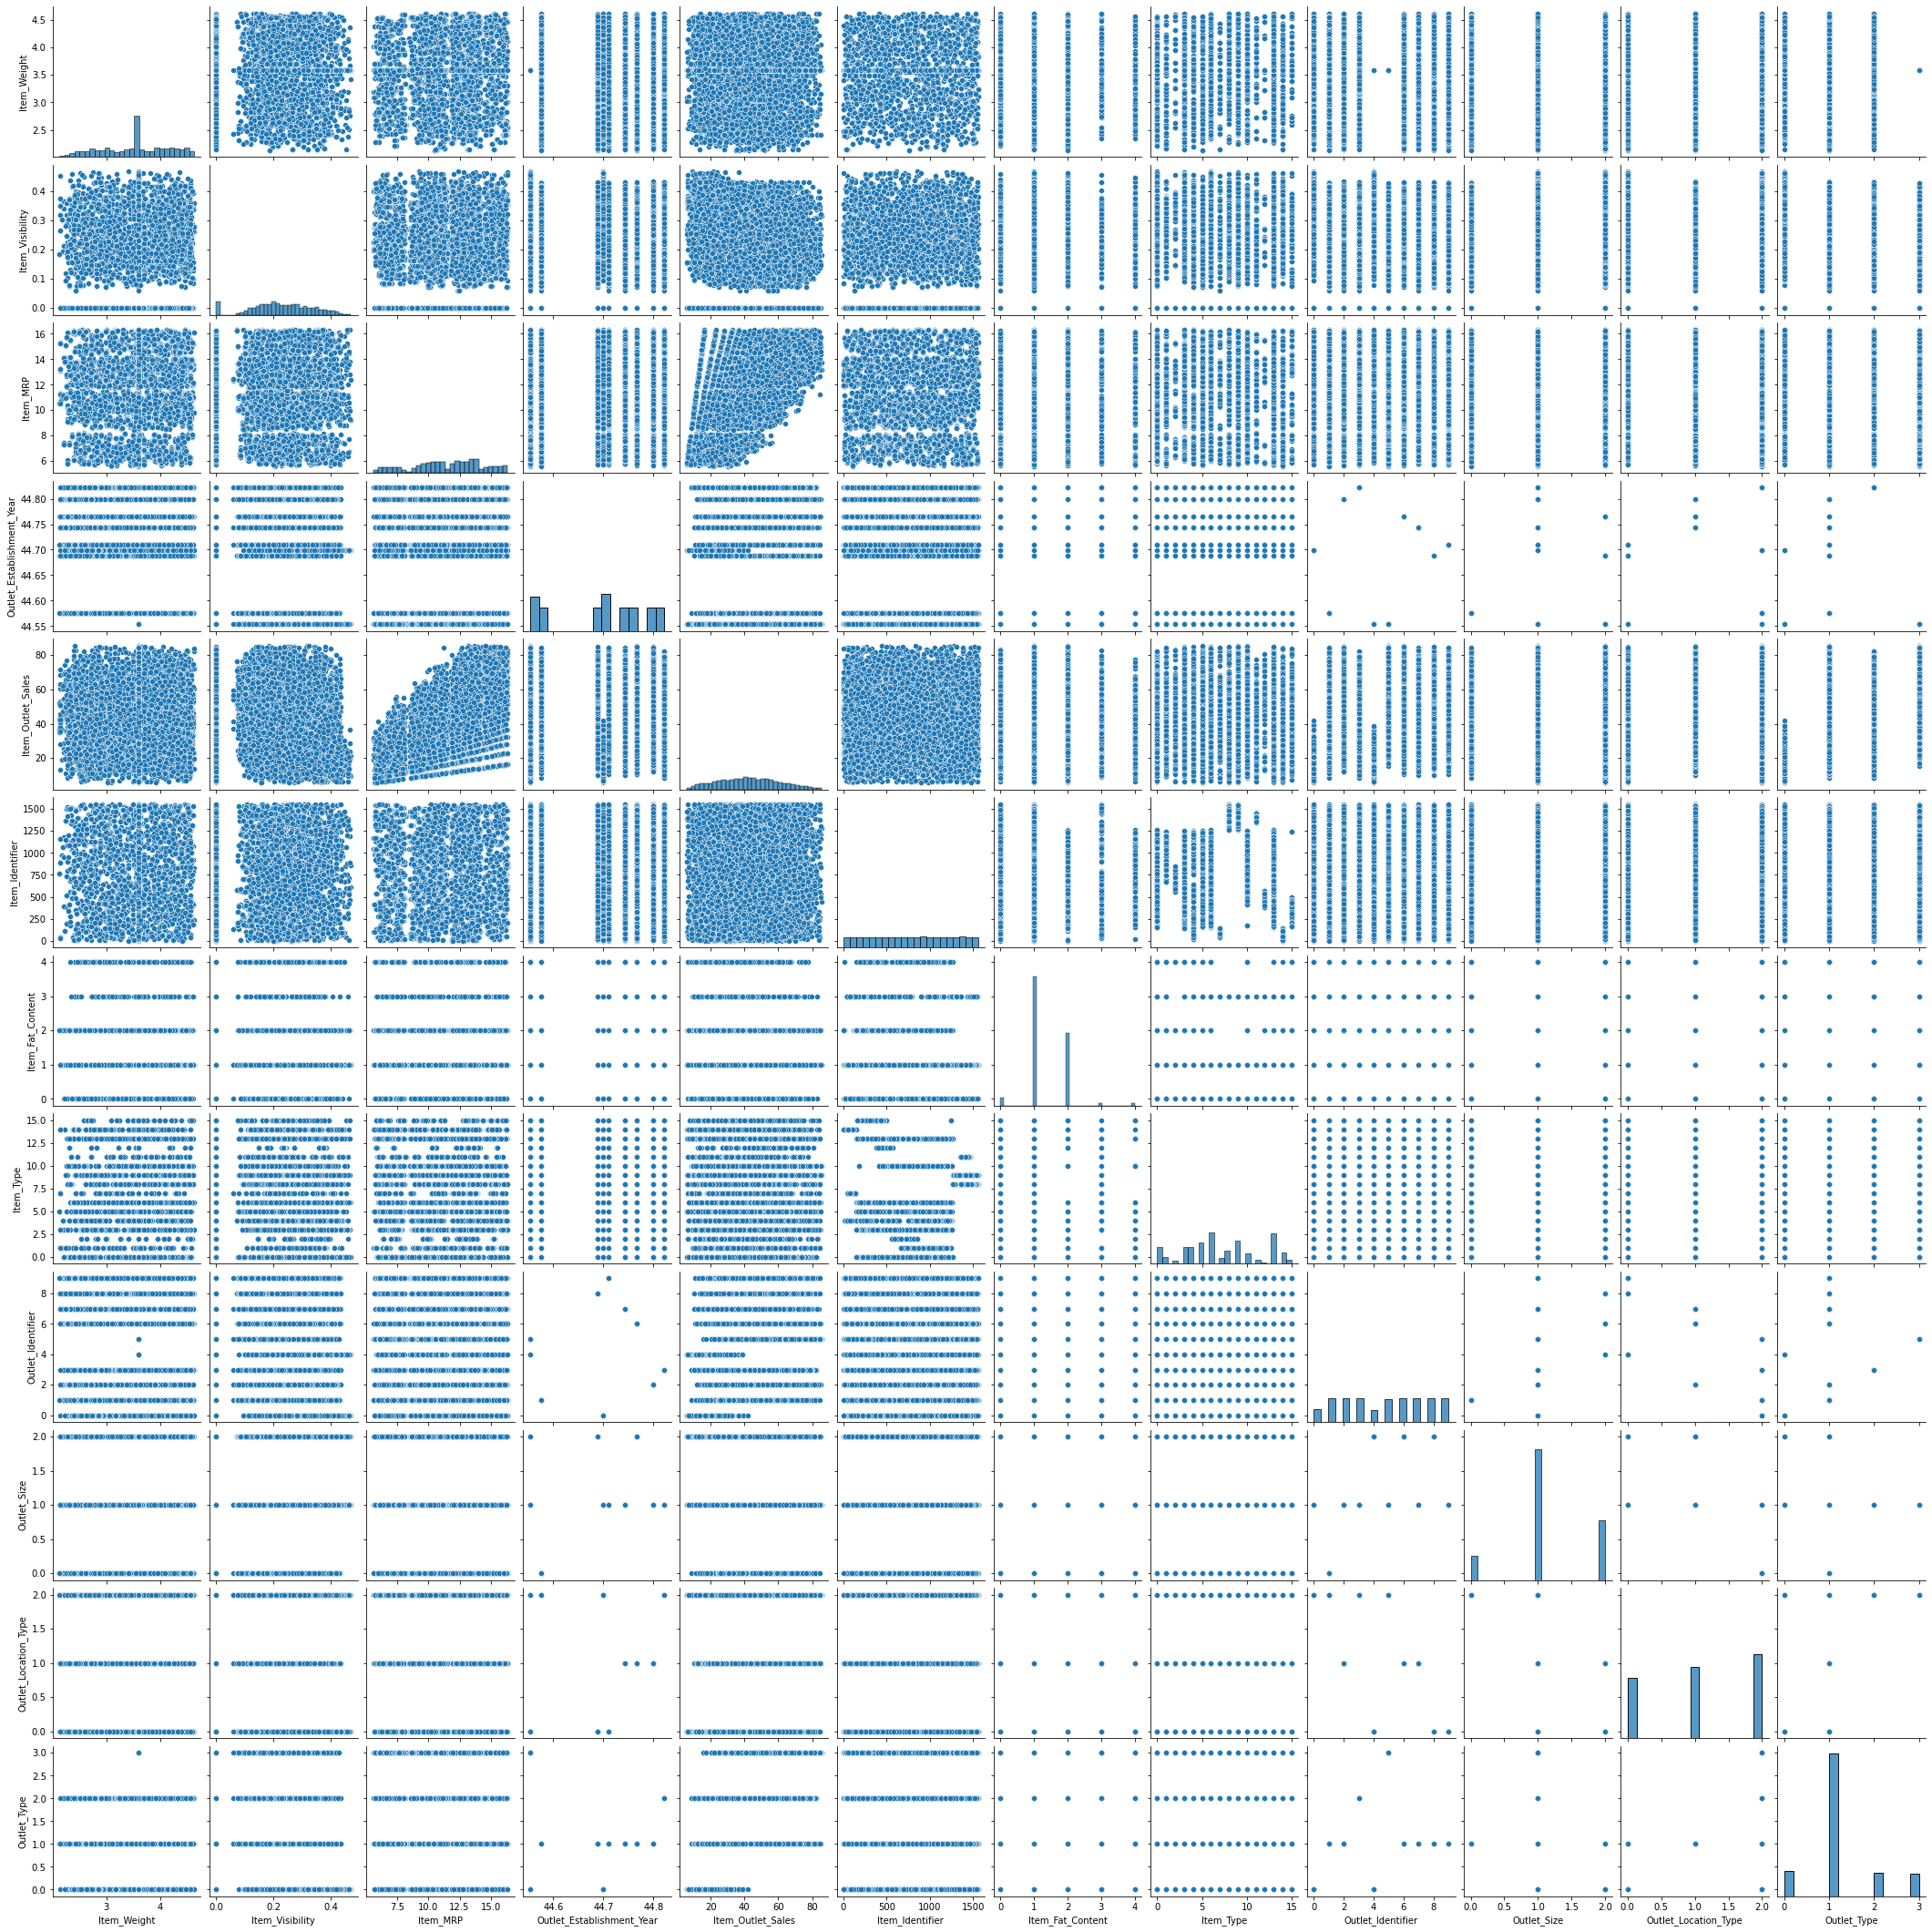

In [156]:
sns.pairplot(train)

From the pair plot we can see the datas are scatterd .

### Splitting the Data into X and Y 

In [60]:
x=train.drop(columns='Item_Outlet_Sales')
y=train['Item_Outlet_Sales']

Here i have splitted the training data into input and output data.

In [81]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.793876,-1.001781,1.557648,0.121522,-1.386901,-0.571925,-0.766589,1.496012,-0.278874,-1.370345,-0.259839
1,-1.804573,-0.884547,-1.654890,1.321361,-1.715672,0.978372,1.610171,-0.615022,-0.278874,1.099060,1.022134
2,1.064786,-0.974970,0.141372,0.121522,-0.262861,-0.571925,0.659467,1.496012,-0.278874,-1.370345,-0.259839
3,1.390185,-2.222264,0.719457,0.001373,0.756773,0.978372,-0.291237,-1.670540,-0.278874,1.099060,-1.541811
4,-0.894341,-2.222264,-1.512926,-1.322255,1.147744,-0.571925,0.421791,-1.318700,-1.940955,1.099060,-0.259839
...,...,...,...,...,...,...,...,...,...,...,...
8333,-1.497981,0.073574,1.137376,-1.322255,-0.911516,-0.571925,1.372495,-1.318700,-1.940955,1.099060,-0.259839
8334,-1.047609,-0.133938,-0.402824,0.481788,0.259174,0.978372,-1.717294,0.792334,-0.278874,-0.135643,-0.259839
8335,-0.455864,-0.415018,-0.828494,0.721816,1.281030,-0.571925,0.184115,0.440495,1.383207,-0.135643,-0.259839
8336,-1.391367,1.449247,-0.491465,1.321361,-0.220653,0.978372,1.372495,-0.615022,-0.278874,1.099060,1.022134


I have standardized the input data by using StandardScaler method.

### Training and Testing Data:

In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state = 101)

#### RandomForestRegressition:

In [96]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train score:" , rfr.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  rfr.score(x_test,y_test))

RMSE : 11.131645654410546
R2 Score 0.6026826148194574
Train score: 0.9481969925753907
Test On TrainDataSet score: 0.6026826148194574


##### Support Vector Regressition:

In [99]:
#Support Vector Regressor
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred)*100)
print("Train Data score:" , svm.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  svm.score(x_test,y_test))


RMSE : 10.733266863998077
R2 Score 63.06120899832878
Train Data score: 0.6583315319485749
Test On TrainDataSet score: 0.6306120899832878


#### Ada Boost Regresstion:

In [100]:
#Ada Boost Regressor:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred)*100)
print("Train Data score:" , abr.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  abr.score(x_test,y_test))

RMSE : 10.674862660142406
R2 Score 63.46211416556873
Train Data score: 0.6450495825853783
Test On TrainDataSet score: 0.6346211416556873


#### Linear Regissition:

In [102]:
#Linear Regression:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train,y_train)
y_pred = lin.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred)*100)
print("Train Data score:" , lin.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  lin.score(x_test,y_test))

RMSE : 11.6461644025473
R2 Score 56.510475920476885
Train Data score: 0.5591739146752286
Test On TrainDataSet score: 0.5651047592047689


#### GradientBoostingRegression:

In [111]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred = gbr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train- Score:-" , gbr.score(x_train,y_train))
print("Test Score:-" , gbr.score(x_test,y_test))

RMSE : 11.6461644025473
R2 Score 0.5651047592047689
Train- Score:- 0.6915310558518664
Test Score:- 0.6527383579315601


In [ ]:
From the ML Models we can find that Supprot Vector Reggression model R2 score is high compare to the other models.
Now we have to do cross validation to check the accuracy.

#### Cross Validation:

In [104]:
from sklearn.model_selection import cross_val_score

scr_svm = cross_val_score(svm,X,y,cv=3)
print("CV Score of SVM :", scr_svm.mean())

CV Score of SVM : 0.6407055210059064


In [105]:
scr_rfr = cross_val_score(rfr,X,y,cv=3)
print("CV Score of RFR :", scr_rfr.mean())

CV Score of RFR : 0.6219569168257925


In [107]:
scr_abr = cross_val_score(abr,X,y,cv=3)
print("CV Score of ABR :", scr_abr.mean())

CV Score of ABR : 0.6337598517931063


In [109]:
scr_lin = cross_val_score(lin,X,y,cv=3)
print("CV Score of LIN :", scr_lin.mean())

CV Score of LIN : 0.5588284046238531


In [112]:
scr_gbr = cross_val_score(gbr,X,y,cv=3)
print("CV Score of GBR :", scr_gbr.mean())

CV Score of GBR : 0.6612205083068597


From the cross validation we  can see that the difference between the r2 score and the CV score difference for the Support Vector Regression is less so we can consider that SVM is the good moeld and now to increase the Score of the SVM modle we have to do the HyperParameter Tuning.

In [113]:
param = {'gamma':['scale','auto'], 'C':[1.0,1.2], 'epsilon':[0.1,0.3],
         'max_iter':[-1],
    
}

In [115]:
grid_search = GridSearchCV(svm,param_grid = param, cv=3)

In [116]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [1.0, 1.2], 'epsilon': [0.1, 0.3],
                         'gamma': ['scale', 'auto'], 'max_iter': [-1]})

In [117]:
grid_search.best_params_

{'C': 1.2, 'epsilon': 0.3, 'gamma': 'auto', 'max_iter': -1}

In [118]:
final = SVR(gamma ='auto', C = 1.2, epsilon = 0.1, max_iter =-1 )

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("Train- Score:-" , final.score(x_train,y_train))
print("Test Score:-" , final.score(x_test,y_test))

Train- Score:- 0.6615864420887279
Test Score:- 0.6316058279120498


By HyperParameter Tuning we can see that the score for the training dataset is increased from 65% to 66% and 
the testing score is also increased considerably to few points.

### Saving the Model:

In [119]:
import joblib
joblib.dump(final,"BigMart-Prediction.pkl")

['BigMart-Prediction.pkl']

### TEsting the Test Data by using the Saved SVM Model:

In [121]:
test1=test.drop(columns='Item_Outlet_Sales')

In [131]:
model = joblib.load("BigMart-Prediction.pkl")
prediction1 = model.predict(test1)
#prediction = pd.DataFrame(prediction)
prediction2=test['Item_Outlet_Sales']

In [141]:
prediction2

0       61.115775
1       21.057607
2       45.795961
3       27.062520
4       31.538947
          ...    
8333    52.710373
8334    23.436830
8335    34.541477
8336    42.960419
8337    27.670743
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

In [145]:
df_prediction=pd.DataFrame({'Predict_score':prediction1,'Actual_score':prediction2})

In [146]:
df_prediction

,Predict_score,Actual_score
0,36.713233,61.115775
1,36.713233,21.057607
2,36.713233,45.795961
3,36.713233,27.062520
4,36.713233,31.538947
...,...,...
8333,36.713233,52.710373
8334,36.713233,23.436830
8335,36.713233,34.541477
8336,36.713233,42.960419
